# Programming for Data Science and Artificial Intelligence

## 8 Unsupervised Learning - Dimensionality Reduction

### Readings:
- [GERON] Ch8
- [VANDER] Ch5
- [HASTIE] Ch14.5
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition
- https://scikit-learn.org/stable/modules/manifold.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Principal Component Analysis

Working directly with high-dimensional data, such as images, comes with some difficulties: It is hard to analyze, interpretation is difficult, visualization is nearly impossible, and (from a practical point of view) storage of the data vectors can be expensive. However, high-dimensional data often has properties that we can exploit. For example, high-dimensional data is often overcomplete, i.e., many dimensions are redundant and can be explained by a combination of other dimensions. 

Furthermore, dimensions in high-dimensional data are often correlated so that the data possesses an intrinsic lower-dimensional structure. Dimensionality reduction exploits structure and correlation and allows us to work with a more compact rep- resentation of the data, ideally without losing information. 

In this lecture, we will discuss principal component analysis (PCA), an algorithm for linear dimensionality reduction. PCA, proposed by Pearson (1901) and Hotelling (1933), has been around for more than 100 years and is still one of the most commonly used techniques for dimensionality reduction. It also inspires more advanced technique such as "autoencoders" in deep neural networks.

**Problem**

In PCA, we are interested in finding projection $\tilde{x}^{(i)}$ of data points $x^{(i)}$ that are as similar to the original data points as possible, but which have a significantly lower intrinsic dimensionality.

More concretely, we consider an i.i.d. dataset $X = \{x^{(1)},\cdots,x^{(m)}\}, x^{(i)} \in \mathbb{R}^n$, with mean 0 and shape of $m\ \times n$ size, ($m$ = samples, $n$ = features) that possess the data covariance matrix

$$S = \frac{1}{m}\sum\limits_{i=1}^{m} x^{(i)} x^{(i)}$$

or 

$$S = \frac{1}{m}X^\top X$$


Furthermore, we assume there exists a low dimensional compressed dimension

$$z^{(i)} = B^\top x^{(i)} \in \mathbb{R}^{n'}$$

of $x^{(i)}$, where we define the projection matrix

$$B := [b_1, \cdots, b_{n'}] \in \mathbb{R}^{n \ \times \ n'}$$

We assume that the columns of $B$ are orthonormal so that $b_i^\top b_j = 0$ iff $i \neq j$ and $b_i^\top b_i = 1$. We seek an $n'$-dimensional subspace $U \subseteq \mathbb{R}^{n}, \dim(U) = n' < n$ onto which we project the data.  We denote the projected data by $\tilde{x}^{(i)} \in U$ and their coordinates (with respect to the basis vectors $b_1, \cdots, b_{n'}$ of $U$) by $z^{(i)}$.  Our aim is to find projections $\tilde{x}^{(i)} \in \mathbb{R}^{n'}$ so that they are as similar to the original data $x^{(i)}$ and minimize the loss due to compression.

**Maximum Variance**

PCA is a dimensionality reduction algorithm that maximizes the variance in the low-dimensional representation of the data to retain as much information as possible.  Our aim is to find a matrix $B$ that retains a smuch as possible when compressing data by projecting it on the subspace spanned by the columns $b_1, \cdots, b_{n'}$ of $B$

For the data covariance matrix, we assumed centered data.  We can make this assumpotion without loss of generality: Let us assume $\mu$ is the mean of the data.  Using the properties of the variance, 

$$\mathbb{V}_x \pm c = \mathbb{V}_x$$

where $c$ is constant; we obtain

$$\mathbb{V}_z[z] = \mathbb{V}_x[B^\top (x - \mu)] = \mathbb{V}_x[B^\top x - B^\top \mu)] = \mathbb{V}_x[B^\top x]$$

That is, the variance of the low-dimensional code does not depend on the mean of the data.  Therefore, we assume without loss of generality that the data has mean 0.  This step is actually optional but will make our math easier later on, especially when we calculate the covariance matrix.

We use sequential approach to maximize the variance of the low-dimensional code.  We start by seeking a single vector $b_1 \in \mathbb{R}^{n}$ that maximizes the variance of the projected data, i.e., we aim to maximize the variance of the first coordinate $z^{(1)}$ of $z \in \mathbb{R}^{n'}$
so that

$$V_1 := \mathbb{V}[z^{(1)}] = \frac{1}{m}\sum\limits_{i=1}^{m}\big(z^{(i)}_1\big)^2 \tag{A}$$

is maximized.  Note that the first component of $z^{(i)}$ is given by

$$z^{(i)}_1 = b_1^\top x^{(i)} \tag{B}$$

i.e., it is the coordinate of the orthogonal projection of $x^{(i)}$ onto the one-dimensional subspace spanned by $b_1$.  We subsitute (B) into (A) yields:

$$V_1 = \frac{1}{m}\sum\limits_{i=1}^{m}\big( b_1^\top x^{(i)}\big)^2 = \frac{1}{m}\sum\limits_{i=1}^{m}b_1^\top x^{(i)}x^{(i)\top}b_1 \tag{C}$$

$$ =b^\top_1\big(\frac{1}{m}\sum\limits_{i=1}^{m}x^{(i)}x^{(i)\top}\big)b_1 = b_1^\top Sb_1 $$

where $S$ is the data covariance matrix defined earlier.  Note that in (C), we have used the fact that the dot product of two vectors is symmetric, i.e., $b_1^\top x^{(i)} = x^{(i)\top}b_1$.

Notice that arbitrarily increasing the magnitude of the vector $b_1$ increases $V_1$, that is, a vector $b_1$ that is two times longer can result in $V_1$ that is potentially four times larger. Therefore, we restrict all solutions to $\lVert b_1\rVert^2 = 1$, which results in a constrained optimization problem in which we seek the direction along which the data varies most.

This can be written into the constrained optimization problem:

$$
\max_{b_1} b_1^\top Sb_1
$$

$$
\text{subject to} \ \lVert b_1\rVert^2 = 1
$$

To solve this, as usual, we use Lagrangian $\mathscr{L}$

$$\mathscr{L}(b_1, \beta) = b_1^\top Sb_1 + \beta_1(1 - b^\top_1b_1)$$

The partial derivatives of $\mathscr{L}$ with respect to $b_1$ and $\beta_1$ are

$$\frac{\partial \mathscr{L}}{\partial b_1} = 2b_1^\top S - 2\beta_1b_1^\top$$

$$\frac{\partial \mathscr{L}}{\partial \beta_1} = 1 - b_1^\top b_1 $$

Setting these partial derivatives to 0 gives us the relations

$$Sb_1 = \beta_1b_1 \tag{D}$$
$$b^\top_1b_1 = 1$$

Looking at this, we see that $b_1$ is an eigenvector of the data covariance matrix $S$, and the Lagrange multiplier $\beta_1$ plays the role of the corresponding eigenvalue.

Following this eigenvector property (D), we can rewrite our variance objective in (C) as

$$V_1 = b^\top_1Sb_1 = \beta_1b^\top_1b_1 = \beta_1$$

i.e., the variance of the data projected onto a one-dimensional subspace equals the eigenvalue that is associated with the basis vector $b_1$ that spans this subspace.  Therefore, to maximize the variance of the low-dimensional code, we choose the basis vector associated with the largest eigenvalue of the data covariance matrix. This eigenvector is called the first *principal component*. We can determine the effect/contribution of the principal component $b_1$ in the original data space by mapping the coordinate $z^{(i)}_1$ back into data space, which gives us the projected data point

$$\tilde{x}^{(i)} = b_1z^{(i)}_1 = b_1b_1^\top x^{(i)} \in \mathbb{R}^n$$

in the original data space.  Although $\tilde{x}^{(i)}$ is a $n$-dimensional vector, it only requires a single coordinate $z^{(i)}_1$ to represent it with respect to the basis vector $b_1 \in \mathbb{R}^n$

When we consider $n'$-dimensional subspace, for the $j$th principal component where $j = 1, \cdots, n'$, the variance is

$$V_j = b^\top_jSb_j = \beta_jb^\top_jb_j = \beta_j$$

This means that the variance of the data, when projected onto an $n'$-dimensional subspace, equals the sum of the eigenvalues that are associated with the corresponding eigenvectors of the data covariance matrix.

Overall, to find an $n'$-dimensional subspace of $\mathbb{R}^D$ that retains as much information as possible, PCA tells us to choose the columns of the matrix B as the $n'$ eigenvectors of the data covariance matrix $S$ that are associated with the $n'$ largest eigenvalues. The maximum amount of variance PCA can capture with the first $n'$ principal components is

$$V_{n'} = \sum\limits_{j=1}^{n'} \beta_j$$

where the $\beta_j$ are the $n'$ largest eigenvalues of the data covariance matrix $S$.  Consequently, the variance lost by data compression via PCA is

$$J_{n'} := \sum\limits_{j=n'+1}^{n} \beta_j = V_n - V_{n'}$$

Instead of these absolute quantities, it is more useful to define the relative variance ratio as

$$J_{n'} = 1 - \frac{V_{n'}}{V_n} $$

**How's related to Singular Value Decomposition (SVD)**

In the previous sections, we obtained the basis of the principal subspace as the eigenvectors that are associated with the largest eigenvalues of the data covariance matrix

$$S = \frac{1}{m}\sum\limits_{i=1}^mx^{(i)}\top x^{(i)} = \frac{1}{m}X^\top X$$

$$X = [x^{(1)}, \cdots, x^{(m)}] \in \mathbb{R}^{n}$$

Since the covariance matrix $S$ is a symmetric matrix ($n \ \times \ n$) and so it can be diagonalized:

$$ S = VLV^\top $$

where $V$ is a matrix of eigenvectors (each column is an eigenvector) and $L$ is a diagonal matrix with eigenvalues $\beta_i$ in the decreasing order on the diagonal.  The eigenvectors are called *principal axes* or *principal directions* of the data.  Projections of the data on the principal axes are called *principal components*.  The $j$-th principal component is given by $j$-th column of $XV$.  The coordinates of the $i$-th data point of the new PC space are given by the $i$th row of $XV$.  Note that this $V$ is the matrix form of $B$ describe in the beginning of this lecture.

If we now perform singular value decomposition of $X, we obtain a decomposition as follows:

$$\underbrace{X}_{m \ \times \ n} = \underbrace{U}_{m \ \times \ m} \ \ \underbrace{\Sigma}_{m \ \times \ n} \ \ \underbrace{V^\top}_{n \ \times \ n}$$

where $U$ and $V$ are orthogonal matrices and $\Sigma$ is a matrix whose only nonzero entries are the singular values $\sigma_{ii} \geq 0$

It then follows that

$$S = \frac{1}{m}X^\top X = \frac{1}{m}V\Sigma \underbrace{U^\top U}_I \Sigma^\top V^\top = V\frac{\Sigma\Sigma^\top}{m} V^\top = V\frac{\Sigma^2}{m} V^\top$$

meaning that the singular vectors $V$ are principal directions and that singular values are related to the eigenvalues of covariance matrix via

$$\beta_i = \frac{\sigma_i^2}{m}$$

Finally, the projected principal components are given by

$$XV = USV^\top V = US$$

To summarize:

1. If $X = USV^\top$, then columns of $V$ are principal direction/axes
2. Squared singular values are the eigenvalues of covariance matrix
3. Columns of $US$ are principal components
4. If we want to plot the eigenvector on the original plot, we can use something called "loadings", which defines as
<code>loading = eigenvectors * sqrt(eigenvalues)</code>  This basically plot the direction scaled by the standard deviation
5. Covariance matrix is equal to $\frac{1}{m}X^\top X$ only if $X$ is centered, i.e., after minusing the mean away
6. In some place, $X$ is of shape $n \ \times m$, then $U$ and $V$ exchange interpretations
7. If one wants to perform PCA on a correlation matrix (instead of a covariance matrix), then columns of $X$ should not only be centered, but standardized as well, i.e. divided by their standard deviations.
8. To reduce the dimensionality from $n$ to $n'$, select $n'$ first columns of $U$, and $n' \ \times \ n'$ upper-left part of $\Sigma$.  Their product $U_{n'}\Sigma_{n'}$ is the required $m \ \times n'$ matrix containing first $n'$ PCs.
9. Further multiplying the first $n'$ PCs by the corresponding principal axes $V_{n'}^\top$ yields $X_{n'} = U_{n'}\Sigma_{n'}V_{n'}^\top$ matrix that has the original $m \ \times n$ shape but is of *lower rank* (of rank $n'$).  This matrix $X_{n'}$ provides a *reconstruction of the original data* from the first $n'$ PCs.  
10. If $m > n$, then the last $m - n$ columns of $U$ are arbitrary (and corresponding rows of $\Sigma$ are constant zero); one should therefore use a thin SVD that returns $U$ of $m \ \times n$ size, dropping the useless columns.

### Scratch

(200, 2)


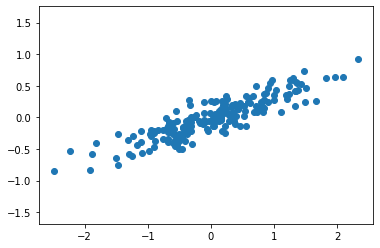

In [2]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

print(X.shape)

2
Eigenvalue shape:  (2,)
Eigenvectors shape:  (2, 2)
eigen:  [0.7625315 0.0184779]
sum:  0.7810093963961743
np.cumsum:  [0.7625315 0.7810094]
eigenvector shape:  (2, 2)
Variance explained_ratio:  [0.97634101 1.        ]
Eigenvalues:  [0.7625315 0.0184779]
Eigenvectors (column-wise):  [[-0.94446029  0.32862557]
 [-0.32862557 -0.94446029]]
Mean:  [ 0.03351168 -0.00408072]
Old X shape:  (200, 2)
Projected X shape:  (200, 2)


(-2.7272887805678496,
 2.914479864281029,
 -0.42809593687865094,
 0.3395486490510208)

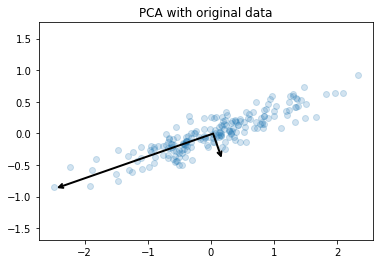

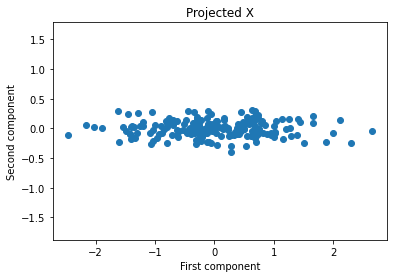

In [3]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

def PCA(X, n_components=1):
    #1. center the data (center the data, not features, thus axis=0)
    mean = np.mean(X, axis=0)
    X = (X - mean)
    
    print(n_components)

    #2. find covariance
    #the reason we can X.T @ X right away since we already 
    #center the data)
    #did not really use this variable
    cov = (X.T @ X) / (X.shape[0] - 1)
    
    #3. Then simply find the eigenvalues using np.linalg.eig 
    #by inputting the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
     
    print("Eigenvalue shape: ", eigenvalues.shape) #(n, )
    print("Eigenvectors shape: ", eigenvectors.shape) #(n, n)

    #4. Your n'th principal components will be your first n'th eigenvectors with highest eigenvalues
    ix = np.argsort(eigenvalues)[::-1] #sort them from biggest to smallest thus -1

    if(n_components > eigenvalues.shape[0]):
        raise Exception("You cannot have n_components more than number of features!")
    else:
        eigenvalues, eigenvectors = eigenvalues[ix], eigenvectors[:, ix]
        #get the first nth components
        eigenvalues, eigenvectors = eigenvalues[:n_components], eigenvectors[:,:n_components]

    print("eigen: ", eigenvalues)
    print("sum: ", np.sum(eigenvalues))
    print("np.cumsum: ", np.cumsum(eigenvalues))
    print("eigenvector shape: ", eigenvectors.shape)
    #define how much variance is gained after n' component
    variance_explained_ratio = np.cumsum(eigenvalues)/np.sum(eigenvalues)

    #projected new vector
    #during projection, eigenvectors mush be arranged in columns
    projected_X = X @ eigenvectors
    
    #print all info
    print("Variance explained_ratio: ", variance_explained_ratio) #first component got 97%
    print("Eigenvalues: ", eigenvalues)
    print("Eigenvectors (column-wise): ", eigenvectors)
    print("Mean: ", mean)
    print("Old X shape: ", X.shape)
    print("Projected X shape: ", projected_X.shape)
    
    #return only n_components eigenvalues and vectors
    return eigenvalues, eigenvectors, mean, projected_X

#copy code from the lectures to plot the eigen values and vectors
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()  #get current axis
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

#main code
eigenvalues, eigenvectors, mean, projected_X = PCA(X, n_components=2)

#looking at the original graph with the loadings
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

#.T so each row is eigenvector, so we can loop
for length, vector in zip(eigenvalues, eigenvectors.T):
    #loadings = eigenvector * (unit size) * sqrt (eigenvalue)
    #https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another
    v = vector * 3 *  np.sqrt(length)
    draw_vector(mean, mean + v)
plt.axis('equal')
plt.title('PCA with original data')

#projection
#you can see that lots of data in the second components is gone
plt.figure()
plt.scatter(projected_X[:, 0], projected_X[:, 1])
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Projected X")
plt.axis('equal')

### Sklearn

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data.

Consider the following 200 points:

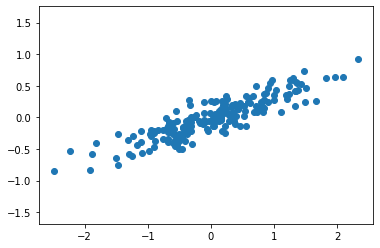

In [4]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');


By eye, it is clear that there is a nearly linear relationship between the x and y variables.
This is reminiscent of the linear regression data we explored in Linear Regression, but the problem setting here is slightly different: rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

*The* fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [6]:
print("Eigenvectors: ", pca.components_)
print("Eigenvalues: ", pca.explained_variance_)
print("Mean: ", pca.mean_) #center point

Eigenvectors:  [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Eigenvalues:  [0.7625315 0.0184779]
Mean:  [ 0.03351168 -0.00408072]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

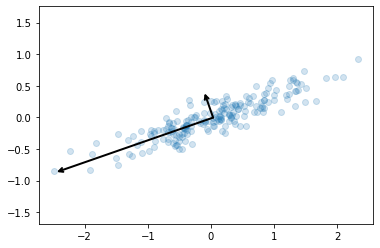

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()  #get current axis
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    #loadings = eigenvector * (unit size) * sqrt (eigenvalue)
    v = vector * 3 *  np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.

#### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [8]:
pca = PCA(n_components=1)  #you want to transform to 1D hence n_components =1
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

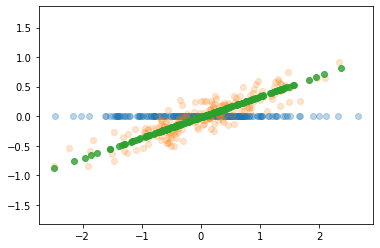

In [9]:
y = np.zeros(X_pca.shape[0])
plt.scatter(X_pca[:, 0], y, alpha=0.3)  #pca data

X_new = pca.inverse_transform(X_pca)  #inverse transform back
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)  #original data
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

#### Case Study: PCA on Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.

We start by loading the data:

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

**Recall** that the data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [11]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


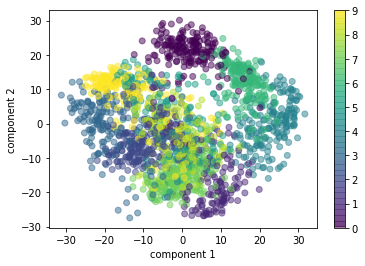

In [12]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

#### What do the components mean?

We can go a bit further here, and begin to ask what the reduced dimensions *mean*.
This meaning can be understood in terms of combinations of basis vectors.
For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

One way we can think about this is in terms of a pixel basis.
That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors.
For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

![](figures/05.09-digits-pixel-components.png)

The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image.
Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image.
Were we to continue this sequence and use all 64 pixels, we would recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.
The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.
This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions:

![](figures/05.09-digits-pca-components.png)

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components!
The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example.
This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

#### How many components?

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:


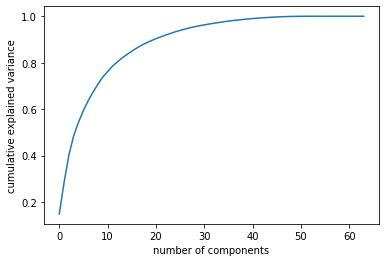

In [13]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### When to / not to use PCA?

Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.
Given any high-dimensional dataset, we tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio).
Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA's **two main weakness** is that it tends to be highly affected by outliers in the data, and its limitation to linear data.  For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
Scikit-Learn contains a couple interesting variants on PCA, including ``IncrementalPCA`` and ``SparsePCA``, both also in the ``sklearn.decomposition`` submodule.
``IncrementalPCA`` uses a mini-batch method to approximate principal components in very high-dimensional data, while ``SparsePCA`` introduces a regularization term that serves to enforce sparsity of the components and often gives a more interpretable model. ``KernelPCA`` is also useful as a variants of PCA for non-linear dimensionality reduction, through the use of kernels (similar to how svm transform the space)  

While PCA is flexible, fast, and easily interpretable, it does not perform well in non-linear situation.  Of course, we got kernel PCA in which it first transform the data space to another dimension in which it can find a linearly separable hyperplane.  

Here we gonna describe another class of methods known as manifold learning.  Manifold means a surface of any shape, it can be a curve, a folded sheet, etc.  Thus manifold learning is the idea of understanding the "shape" of the data and thus using this information fo cluster the data.  You can imagine paper twirling into very weird shape but it is actually just a 2d paper.  Similarly, Manifold Learning words towards extracting the low-dimensional manifold information that can be used to describe the high dimensional data.

As you may have guess, manifold learning has many things to do with distances between neighbors

![](figures/swissroll.png)

#### Manifold Learning: Swiss roll

As an example of using manifold learning for visualization, let's take a look at the swiss roll dataset which is a typical dataset to look at for manifold learning.

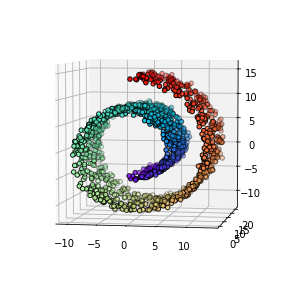

In [14]:
from sklearn import manifold, datasets

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

#elevation and #azimuth
ax.view_init(5, -80)

X, color = datasets.make_swiss_roll(n_samples=1500, noise=0.3)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap="rainbow",
          edgecolor='k')

Looking at data like this, we can see that the particular choice of *x* and *y* values of the dataset are not the most fundamental description of the data: we can scale, shrink, or rotate the data, and the swiss roll will still be apparent.

This tells us that the *x* and *y* values are not necessarily fundamental to the relationships in the data.
What *is* fundamental, in this case, is the *distance* between each point and the other points in the dataset.
A common way to represent this is to use a distance matrix: for $N$ points, we construct an $N \times N$ array such that entry $(i, j)$ contains the distance between point $i$ and point $j$.
Let's use Scikit-Learn's efficient ``pairwise_distances`` function to do this for our original data:

In [15]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
print(D.shape)
print("Distance between first point and others: ", D[0].shape)

(1500, 1500)
Distance between first point and others:  (1500,)


What is interesting is that if we rotate our swissroll, D remains the same!

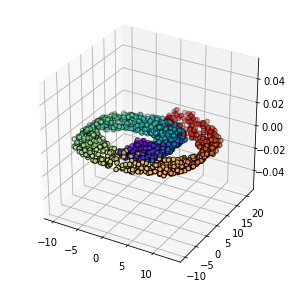

In [16]:
#https://mathworld.wolfram.com/RotationMatrix.html
#matrix rotation can be a bit confusing
#if we want to rotate around x, x is kept the same
def x_rotation(vector,theta):
    """Rotates 3-D vector around x-axis"""
    R = np.array([[1,0,0],[0,np.cos(theta),-np.sin(theta)],[0, np.sin(theta), np.cos(theta)]])
    return np.dot(vector, R)

def y_rotation(vector,theta):
    """Rotates 3-D vector around y-axis"""
    R = np.array([[np.cos(theta),0,np.sin(theta)],[0,1,0],[-np.sin(theta), 0, np.cos(theta)]])
    return np.dot(vector, R)

def z_rotation(vector,theta):
    """Rotates 3-D vector around z-axis"""
    R = np.array([[np.cos(theta), -np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]])
    return np.dot(vector, R)

X_rotate = x_rotation(X, 20)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_rotate[:, 0], X_rotate[:, 1], c=color, cmap="rainbow",
          edgecolor='k')


In [17]:
D2 = pairwise_distances(X_rotate)
np.allclose(D, D2)

True

This distance matrix gives us a representation of our data that is invariant to rotations and translations.  However, while computing this distance matrix from the (x, y) coordinates is straightforward, transforming the distances back into *x* and *y* coordinates is rather difficult.  

Here, let's introduce the first manifold learning algorithm - the Multidimensional Scaling (MDS): given a distance matrix between points, it recovers a $D$-dimensional coordinate representation of the data.
Let's see how it works for our distance matrix, using the ``precomputed`` dissimilarity to specify that we are passing a distance matrix:

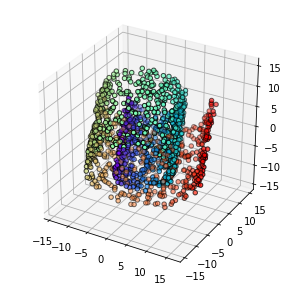

In [18]:
from sklearn.manifold import MDS
#dissimilarity='precomputed' since we already calculate the distance
#if not, use euclidean
model = MDS(n_components=3, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(out[:, 0], out[:, 1], out[:, 2], c=color, cmap="rainbow",
          edgecolor='k')

We can now ask the ``MDS`` estimator to input this three-dimensional data, compute the distance matrix, and then determine the optimal two-dimensional embedding for this distance matrix.
The result recovers a representation of the original data:

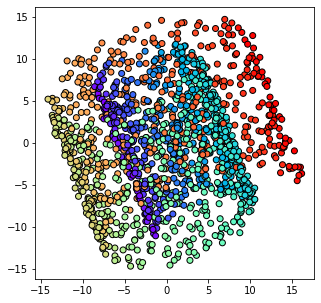

In [19]:
model = MDS(n_components=2, random_state=1)
out2 = model.fit_transform(out)
fig = plt.figure(figsize=(5, 5))
plt.scatter(out[:, 0], out[:, 1], c=color, cmap="rainbow",
          edgecolor='k')

This is essentially the goal of a manifold learning estimator: given high-dimensional embedded data, it seeks a low-dimensional representation of the data that preserves certain relationships within the data.
In the case of MDS, the quantity preserved is the distance between every pair of points.

#### Nonlinear Embeddings: Where MDS Fails

Our discussion thus far has considered *linear* embeddings, which essentially consist of rotations, translations, and scalings of data into higher-dimensional spaces.
Where MDS breaks down is when the embedding is nonlinear—that is, when it goes beyond this simple set of operations.

In non-linear embeddings, you may want to consider:

- For toy problems such as the swiss roll we saw before, locally linear embedding (LLE) and its variants (especially *modified LLE*), perform very well. This is implemented in ``sklearn.manifold.LocallyLinearEmbedding``.
- For high-dimensional data from real-world sources, LLE often produces poor results, and isometric mapping (IsoMap) seems to generally lead to more meaningful embeddings. This is implemented in ``sklearn.manifold.Isomap``
- For data that is highly clustered, *t-distributed stochastic neighbor embedding* (t-SNE) seems to work very well, though can be very slow compared to other methods. This is implemented in ``sklearn.manifold.TSNE``.

#### LocallyLinearEmbedding

Provided there is sufficient data, we expect each data point and its neighbors to lie on or close to a locally linear patch.

Comprises of the following steps:
1. Find the k nearest neighbors
2. Do a weighted aggregation of the neighbours of each point to construct a new point, in which the cost function is to minimize the distance to neighbor points

Disadvantages:
1. Scale poorly to large datasets 

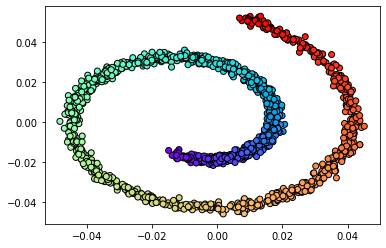

In [20]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=500, n_components=2)
out = model.fit_transform(X)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], c=color, cmap="rainbow",
          edgecolor='k')

#### Isomap

One of the earliest approaches to manifold learning is the Isomap algorithm, short for Isometric Mapping. Isomap can be viewed as an extension of Multi-dimensional Scaling (MDS) or Kernel PCA. Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points. Isomap can be performed with the object Isomap.

The basic steps are
1. Use euclidean metrics to prepare a graph distance
2. Compute all-pairs shortest paths which output the geodesic distance on the above neighborhood graph.
3. Run multidimensional scaling using the matrix of shortest-path distances.

The disadvantage:
- Creating neighorhood graph can be tricky and if the input data is not well sampled (e.g., contain holes), then Isomap may not work well.
- Computaionally expensive

![](figures/geo.png)

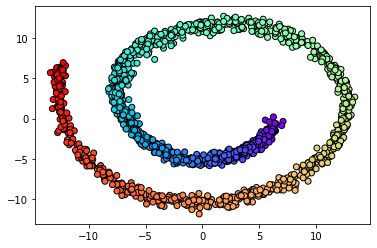

In [21]:
from sklearn.manifold import Isomap
model = Isomap(n_neighbors=500, n_components=2)
out = model.fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], c=color, cmap="rainbow",
          edgecolor='k')

#### t distribution-Stochastic neighborhood embedding

tsne is about giving you clusters or local structure, and mostly used for visualization purpose.

While Isomap, LLE and variants are best suited to unfold a single continuous low dimensional manifold, t-SNE will focus on the local structure of the data and will tend to extract clustered local groups of samples.  This tend to be useful if we want to classify things that contain multiple manifolds such as digits.

Comprises of these steps:
1. Measure similarity between two data points (e.g., distances)
2. Convert this distance to probability according to normal distribution
3. Now, it simply map the data points to a lower dimensional space
4. Calculate the similarity matrix (similar to two) but with t-distribution.  It uses t-distribution to avoid crowding problem, where points tend to be crowded in low-dimensional space
5. Using optimization algorithms (e.g., Descent algorithms with Kullback Leibler Divergence), it aims to reduce the difference between similarity matrix of 2 and 4

The disadvantages to using t-SNE are roughly:

- t-SNE is computationally expensive, and can take several hours on million-sample datasets where PCA will finish in seconds or minutes
- The algorithm is stochastic and multiple restarts with different seeds can yield different embeddings. However, it is perfectly legitimate to pick the embedding with the least error.
- Also the solution is not convex, thus descent algorithms can stuck in local minima.  We may want to initialize different random points and compare

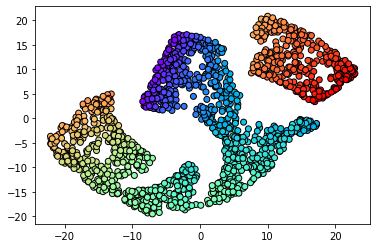

In [22]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, perplexity=100)
out = model.fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], c=color, cmap="rainbow",
          edgecolor='k')

#### So what next about Manifold Learning

Though this story and motivation is compelling, in practice manifold learning techniques tend to be finicky enough that they are rarely used for anything more than simple qualitative visualization of high-dimensional data.

The following are some of the particular challenges of manifold learning, which all contrast poorly with PCA:

- No mechanism for handling missing data.  PCA does.
- Sensitive to noise.  PCA filters noise from most important components
- Choosing optimal number of neighbors or other hyperparameters.  PCA does not need to
- PCA has variance_ratio to help you determine to optimal dimension to be reduced. Manifold does not
- PCA has high interpretability.  By looking at the magnitude of eigenvectors, we can gauge which features are impactful, whereas manifold learning is not always clear
- In manifold learning the computational expense of manifold methods scales as O[N^2] or O[N^3]. For PCA, there exist randomized approaches that are generally much faster 

With all that on the table, the only clear advantage of manifold learning methods over PCA is their ability to preserve nonlinear relationships in the data.  If for visualization purpose, then manifold learning is ok.  But for dimensionality reduction, we can always go for **Kernel PCA**, which is much faster!!

A heads up - in Artifical Neural Network (and Deep Learning), we will explore a concept called **Autoencoders** which is basically Dimensionality Reduction.  As you can already imagine, by adjusting the weights and assign an activation function, we can create a dimensionality reduction that aims to reduce unimportant features, even in non-linear space!

Last, I will leave the below code for Kernel PCA.

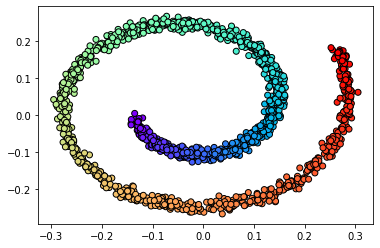

In [23]:
from sklearn.decomposition import KernelPCA
model = KernelPCA(kernel="rbf", n_components=2,
                 gamma=0.0003)
out = model.fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], c=color, cmap="rainbow",
          edgecolor='k')

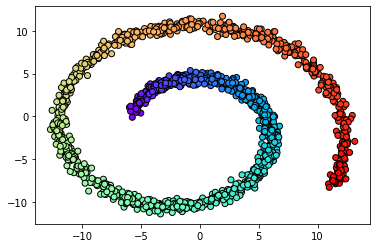

In [24]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
out = model.fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], c=color, cmap="rainbow",
          edgecolor='k')

### ===Task===

Your work: Let's modify the above scratch code:
- Modify so instead of using np.linalg.eigh, let's replace it with scratch code using SVD approach